In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('/content/patan_final.xlsx')
data.head()

,Date,Arrival,Price
0,2010-01-01,84.8,2755.0
1,2010-01-02,75.8,2750.0
2,2010-01-03,80.3,2752.5
3,2010-01-04,87.4,2750.0
4,2010-01-05,122.1,2770.0


In [3]:
data.set_index('Date', inplace=True)
data.head(1)

,Arrival,Price
Date,,
2010-01-01,84.8,2755.0


In [4]:
macro_data = data[['Arrival','Price']]
print(macro_data.shape)

(5438, 2)


In [5]:
ad_fuller_result_1 = adfuller(macro_data['Arrival'].diff()[1:])

print('Arrivals')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Price'].diff()[1:])

print('Price')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Arrivals
ADF Statistic: -16.65805553847737
p-value: 1.5829176083531186e-29

---------------------

Price
ADF Statistic: -11.781348606851434
p-value: 1.0330943009576943e-21


In [6]:
print('Price causes Arrivals?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Arrival', 'Price']], 3)

print('\nArrivals causes Price?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['Price', 'Arrival']], 3)

Price causes Arrivals?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3112  , p=0.5770  , df_denom=5434, df_num=1
ssr based chi2 test:   chi2=0.3114  , p=0.5769  , df=1
likelihood ratio test: chi2=0.3113  , p=0.5769  , df=1
parameter F test:         F=0.3112  , p=0.5770  , df_denom=5434, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8509  , p=0.0001  , df_denom=5431, df_num=2
ssr based chi2 test:   chi2=17.7182 , p=0.0001  , df=2
likelihood ratio test: chi2=17.6893 , p=0.0001  , df=2
parameter F test:         F=8.8509  , p=0.0001  , df_denom=5431, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.5381  , p=0.0000  , df_denom=5428, df_num=3
ssr based chi2 test:   chi2=28.6513 , p=0.0000  , df=3
likelihood ratio test: chi2=28.5760 , p=0.0000  , df=3
parameter F test:         F=9.5381  , p=0.0000  , df_denom=5428, df_num=3

Arrivals causes Price?

------------------



In [7]:
train_df=macro_data[:-1000]
test_df=macro_data[-1000:]

In [8]:
model = VAR(train_df.diff()[1:])

In [9]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.54       19.54   3.048e+08       19.54
1        19.03       19.03   1.832e+08       19.03
2        18.94       18.95   1.680e+08       18.94
3        18.92       18.94   1.640e+08       18.92
4        18.90       18.92   1.613e+08       18.91
5        18.89       18.93   1.606e+08       18.91
6        18.89       18.93   1.596e+08       18.90
7        18.88       18.92   1.581e+08       18.89
8        18.88       18.93   1.580e+08       18.90
9        18.88       18.93   1.579e+08       18.90
10       18.87       18.93   1.568e+08       18.89
11       18.85       18.92   1.543e+08       18.88
12       18.85       18.92   1.534e+08       18.87
13       18.84      18.92*   1.525e+08      18.87*
14       18.84       18.93   1.524e+08       18.87
15       18.84       18.93   1.524e+08       18.87
16       18.84       18.94   1.

In [10]:
var_model = VARMAX(train_df, order=(13,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                            Statespace Model Results                            
Dep. Variable:     ['Arrival', 'Price']   No. Observations:                 4438
Model:                          VAR(13)   Log Likelihood              -54331.570
                            + intercept   AIC                         108777.141
Date:                  Thu, 28 Nov 2024   BIC                         109141.824
Time:                          17:03:59   HQIC                        108905.731
Sample:                      01-01-2010                                         
                           - 02-24-2022                                         
Covariance Type:                    opg                                         
Ljung-Box (L1) (Q):             0.00, 0.13   Jarque-Bera (JB):   124439.14, 868995.06
Prob(Q):                        0.97, 0.71   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         3.97, 0.35   Skew:                        1.48, -1.98
Prob(H) (two-

In [11]:
n_forecast = 1000
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [12]:
predictions

,Arrival,Price
2022-02-25,139.544962,6719.102950
2022-02-26,171.782379,6724.245968
2022-02-27,150.048084,6710.552286
2022-02-28,152.737198,6679.790160
2022-03-01,151.044619,6647.431122
...,...,...
2024-11-16,259.304229,4606.532751
2024-11-17,259.378988,4605.824365
2024-11-18,259.453605,4605.117324
2024-11-19,259.528079,4604.411626


In [13]:
predictions.columns=['Arrivals_predicted','Price_predicted']
predictions

,Arrivals_predicted,Price_predicted
2022-02-25,139.544962,6719.102950
2022-02-26,171.782379,6724.245968
2022-02-27,150.048084,6710.552286
2022-02-28,152.737198,6679.790160
2022-03-01,151.044619,6647.431122
...,...,...
2024-11-16,259.304229,4606.532751
2024-11-17,259.378988,4605.824365
2024-11-18,259.453605,4605.117324
2024-11-19,259.528079,4604.411626


In [14]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [15]:
test_vs_pred = test_vs_pred.reset_index()

In [16]:
test_vs_pred.head()

,index,Arrival,Price,Arrivals_predicted,Price_predicted
0,2022-02-25,181.950,6840.0,139.544962,6719.102950
1,2022-02-26,92.700,6865.0,171.782379,6724.245968
2,2022-02-27,185.500,6880.0,150.048084,6710.552286
3,2022-02-28,255.380,6915.0,152.737198,6679.790160
4,2022-03-01,187.306,6824.0,151.044619,6647.431122


In [17]:
test_vs_pred_1 = test_vs_pred[:1000][['index','Arrival','Price']].copy()
test_vs_pred_1

,index,Arrival,Price
0,2022-02-25,181.950,6840.0
1,2022-02-26,92.700,6865.0
2,2022-02-27,185.500,6880.0
3,2022-02-28,255.380,6915.0
4,2022-03-01,187.306,6824.0
...,...,...,...
995,2024-11-16,238.050,6475.0
996,2024-11-17,234.558,6441.0
997,2024-11-18,217.580,6450.0
998,2024-11-19,306.980,6450.0


In [18]:
test_vs_pred_2 = test_vs_pred[1000:][['Arrivals_predicted','Price_predicted']].copy()
test_vs_pred_2.index = range(len(test_vs_pred_2)) # Reset the index to start from 0
test_vs_pred_2

,Arrivals_predicted,Price_predicted


In [19]:

test_vs_pred_combined = pd.concat([test_vs_pred_1, test_vs_pred_2], axis=1)
test_vs_pred_combined

,index,Arrival,Price,Arrivals_predicted,Price_predicted
0,2022-02-25,181.950,6840.0,NaN,NaN
1,2022-02-26,92.700,6865.0,NaN,NaN
2,2022-02-27,185.500,6880.0,NaN,NaN
3,2022-02-28,255.380,6915.0,NaN,NaN
4,2022-03-01,187.306,6824.0,NaN,NaN
...,...,...,...,...,...
995,2024-11-16,238.050,6475.0,NaN,NaN
996,2024-11-17,234.558,6441.0,NaN,NaN
997,2024-11-18,217.580,6450.0,NaN,NaN
998,2024-11-19,306.980,6450.0,NaN,NaN


In [20]:
test_vs_pred.set_index('index',inplace=True)

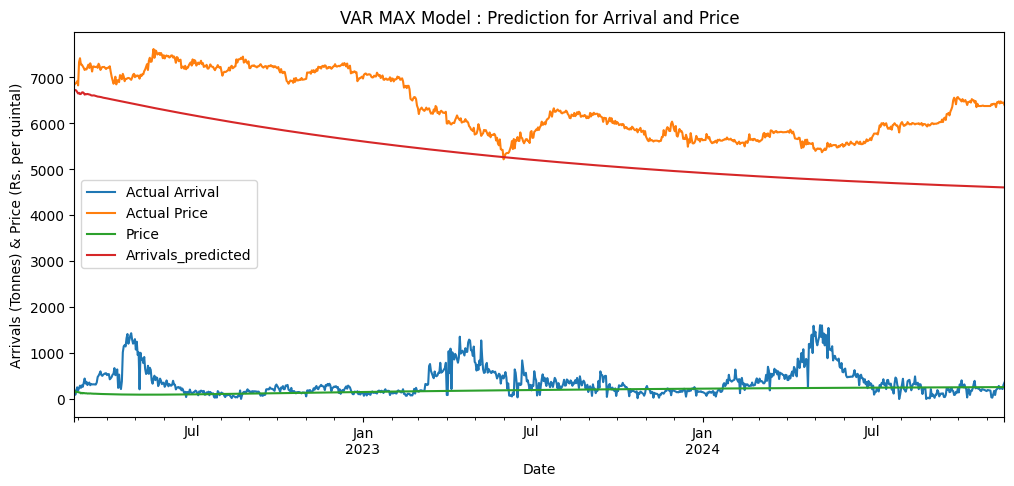

In [25]:
test_vs_pred.plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("Arrivals (Tonnes) & Price (Rs. per quintal)")
plt.title("VAR MAX Model : Prediction for Arrival and Price")
new_legend_labels = ['Actual Arrival', 'Actual Price'] + list(test_vs_pred_combined.columns[2:])  # Keeping the rest unchanged
plt.legend(labels=new_legend_labels)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_Arrivals=math.sqrt(mean_squared_error(predictions['Arrivals_predicted'],test_df['Arrival']))
print('Mean value of Arrivals is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Arrival']),rmse_Arrivals))

rmse_Price=math.sqrt(mean_squared_error(predictions['Price_predicted'],test_df['Price']))
print('Mean value of Price is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Price']),rmse_Price))

Mean value of Arrivals is : 355.97677432222224. Root Mean Squared Error is :342.4491051474829
Mean value of Price is : 6353.292616666667. Root Mean Squared Error is :1080.9260471253717


In [23]:
rmse_Arrivals_percentage = (rmse_Arrivals / mean(test_df['Arrival'])) * 100
print('Mean value of Arrivals is : {}. Root Mean Squared Error is : {}. RMSE Percentage: {:.2f}%'.format(mean(test_df['Arrival']), rmse_Arrivals, rmse_Arrivals_percentage))

rmse_Price_percentage = (rmse_Price / mean(test_df['Price'])) * 100
print('Mean value of Price is : {}. Root Mean Squared Error is : {}. RMSE Percentage: {:.2f}%'.format(mean(test_df['Price']), rmse_Price, rmse_Price_percentage))

Mean value of Arrivals is : 355.97677432222224. Root Mean Squared Error is : 342.4491051474829. RMSE Percentage: 96.20%
Mean value of Price is : 6353.292616666667. Root Mean Squared Error is : 1080.9260471253717. RMSE Percentage: 17.01%
